# Knock Airport Weather
---



In [1]:
import pandas as pd
import seaborn as sns

In [13]:
df = pd.read_csv('https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv', skiprows=23)
df.head(3)

/var/folders/z9/09xfwp1176g6s9d05jk7x3s00000gn/T/ipykernel_35401/2746792646.py:1: DtypeWarning: Columns (2,10,12,14,15,16,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv', skiprows=23)


,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,10-apr-1996 14:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,0,0,0,25,81,0.0,35000,32,5
1,31-jul-1996 08:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0,0,0,25,82,0.0,40000,45,5
2,31-jul-1996 09:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,0,0,0,80,81,0.0,8000,32,7


### Info about the DateFrame

- Station Name: KNOCK AIRPORT	
- Station Height: 201 M	
- Latitude: 53.906	
- Longitude: -8.817
    
    
| **Column** | **Description**                              |
|------------|----------------------------------------------|
| `datetime` | Date and Time (UTC)                         |
| `rain`     | Precipitation Amount (mm)                   |
| `temp`     | Air Temperature (°C)                        |
| `wetb`     | Wet Bulb Temperature (°C)                   |
| `dewpt`    | Dew Point Temperature (°C)                  |
| `rhum`     | Relative Humidity (%)                       |
| `vappr`    | Vapour Pressure (hPa)                       |
| `msl`      | Mean Sea Level Pressure (hPa)               |
| `wdsp`     | Mean Wind Speed (knots)                     |
| `wddir`    | Predominant Wind Direction (degrees)        |
| `ww`       | Synop code for Present Weather              |
| `w`        | Synop code for Past Weather                 |
| `sun`      | Sunshine Duration (hours)                   |
| `vis`      | Visibility (m)                              |
| `clht`     | Cloud Height (100's of ft) - 999 if none    |
| `clamt`    | Cloud Amount                                |
| `ind`      | Indicator                                   |

In [14]:
print(df.dtypes)

date      object
ind        int64
rain      object
ind.1      int64
temp     float64
ind.2      int64
wetb     float64
dewpt    float64
vappr    float64
rhum       int64
msl       object
ind.3      int64
wdsp      object
ind.4      int64
wddir     object
ww        object
w         object
sun      float64
vis       object
clht      object
clamt     object
dtype: object


In [18]:
df['date'] = pd.to_datetime(df['date'], format='%d-%b-%Y %H:%M')
df['rain'] = pd.to_numeric(df['rain'], errors='coerce')
df['msl'] = pd.to_numeric(df['msl'], errors='coerce')
df['wdsp'] = pd.to_numeric(df['wdsp'], errors='coerce')
df['wddir'] = pd.to_numeric(df['wddir'], errors='coerce')
df['ww'] = pd.to_numeric(df['ww'], errors='coerce')
df['w'] = pd.to_numeric(df['w'], errors='coerce')
df['vis'] = pd.to_numeric(df['vis'], errors='coerce')
df['clht'] = pd.to_numeric(df['clht'], errors='coerce')
df['clamt'] = pd.to_numeric(df['clamt'], errors='coerce')
df = df.rename(columns={'date': 'datetime'})

In [19]:
df.head()

,datetime,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,1996-04-10 14:00:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,0.0,0,0.0,25.0,81.0,0.0,35000.0,32.0,5.0
1,1996-07-31 08:00:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0.0,0,0.0,25.0,82.0,0.0,40000.0,45.0,5.0
2,1996-07-31 09:00:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,0.0,0,0.0,80.0,81.0,0.0,8000.0,32.0,7.0
3,1996-07-31 10:00:00,0,0.0,0,12.9,0,11.3,9.8,0.0,0,...,0,0.0,0,0.0,25.0,82.0,0.0,28000.0,35.0,6.0
4,1996-07-31 11:00:00,0,0.0,0,14.5,0,10.8,7.0,0.0,0,...,0,0.0,0,0.0,2.0,11.0,0.0,40000.0,40.0,6.0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248394 entries, 0 to 248393
Data columns (total 21 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   datetime  248394 non-null  datetime64[ns]
 1   ind       248394 non-null  int64         
 2   rain      248345 non-null  float64       
 3   ind.1     248394 non-null  int64         
 4   temp      248394 non-null  float64       
 5   ind.2     248394 non-null  int64         
 6   wetb      248394 non-null  float64       
 7   dewpt     248394 non-null  float64       
 8   vappr     248394 non-null  float64       
 9   rhum      248394 non-null  int64         
 10  msl       248376 non-null  float64       
 11  ind.3     248394 non-null  int64         
 12  wdsp      248344 non-null  float64       
 13  ind.4     248394 non-null  int64         
 14  wddir     248342 non-null  float64       
 15  ww        192908 non-null  float64       
 16  w         192907 non-null  float64    

In [21]:
print(df.isnull().sum())    # Count missing values in each column

datetime        0
ind             0
rain           49
ind.1           0
temp            0
ind.2           0
wetb            0
dewpt           0
vappr           0
rhum            0
msl            18
ind.3           0
wdsp           50
ind.4           0
wddir          52
ww          55486
w           55487
sun             0
vis         62581
clht           18
clamt          18
dtype: int64


In [64]:
# Fill missing values with the mean of the column
df['wdsp'] = df['wdsp'].fillna(df['wdsp'].mean())

In [53]:
# set datetime as index
df.set_index('datetime', inplace = True)

## Plots
---
- The temperature
- The mean temperature each day
- The mean temperature for each month
- The Windspeed (there is data missing from this column)
- The rolling windspeed (say over 24 hours)
- The max windspeed for each day
- The monthly mean of the daily max windspeeds 

In [ ]:
# Set a beautiful and consistent style for Seaborn
sns.set_theme(style="whitegrid",        # Background with grid lines
              palette="pastel",          # Set color palette
              font_scale=1.2,            # Increase font size for better readability
              rc={"axes.titlesize": 16,  # Set axes title size
                  "axes.labelsize": 14,  # Set axes label size
                  "xtick.labelsize": 12, # Set x-axis tick size
                  "ytick.labelsize": 12, # Set y-axis tick size
                  "figure.figsize": (10, 6),  # Default figure size (width, height)
                  "figure.autolayout": True})  # Ensure tight layout to avoid overlapping labels

<Axes: xlabel='datetime', ylabel='temp'>

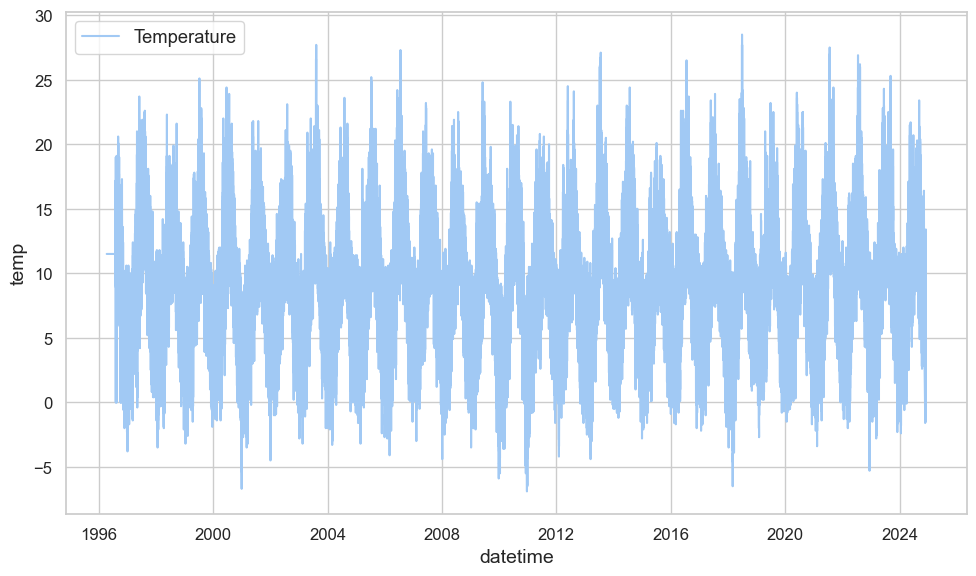

In [43]:
# The temperature

sns.lineplot(data=df, x='datetime', y='temp', label='Temperature')

<Axes: xlabel='datetime', ylabel='temp'>

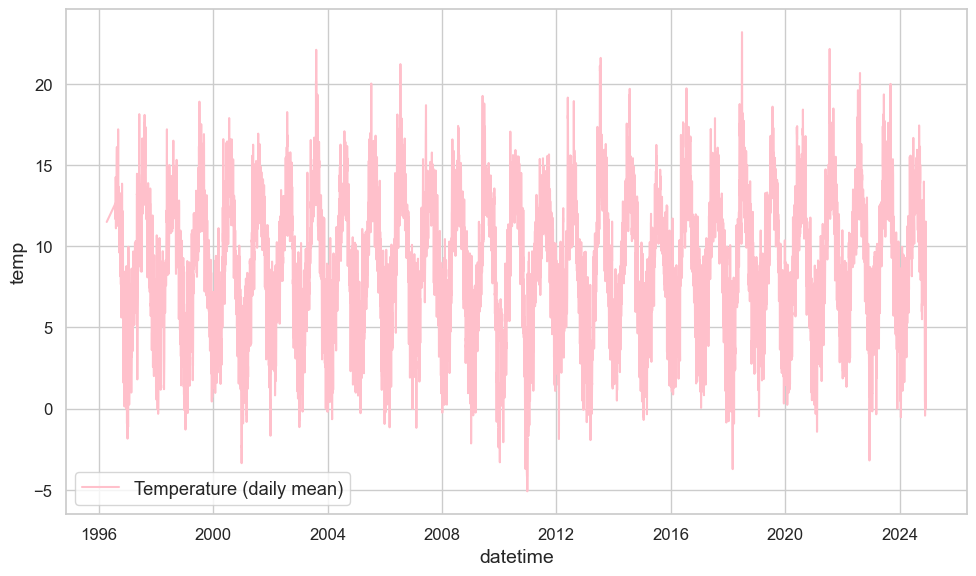

In [ ]:
# The mean temperature each day
rs_1day = df['temp'].resample("D").mean()
sns.lineplot(data=rs_1day, label='Temperature (daily mean)', color='pink')

<Axes: xlabel='datetime', ylabel='temp'>

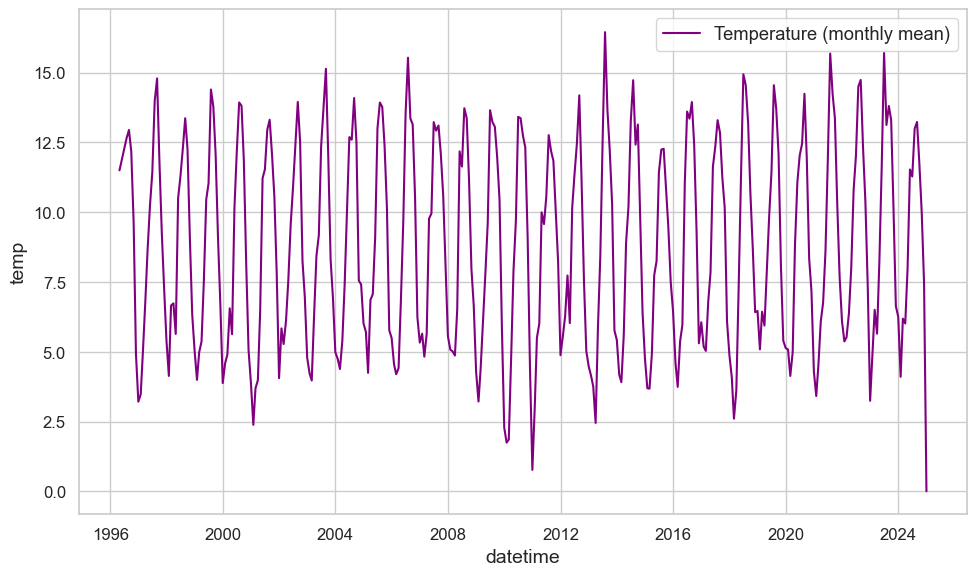

In [63]:
# The mean temperature each month
rs_1month = df['temp'].resample("ME").mean()
sns.lineplot(data=rs_1month, label='Temperature (monthly mean)', color='purple')

<Axes: xlabel='datetime', ylabel='wdsp'>

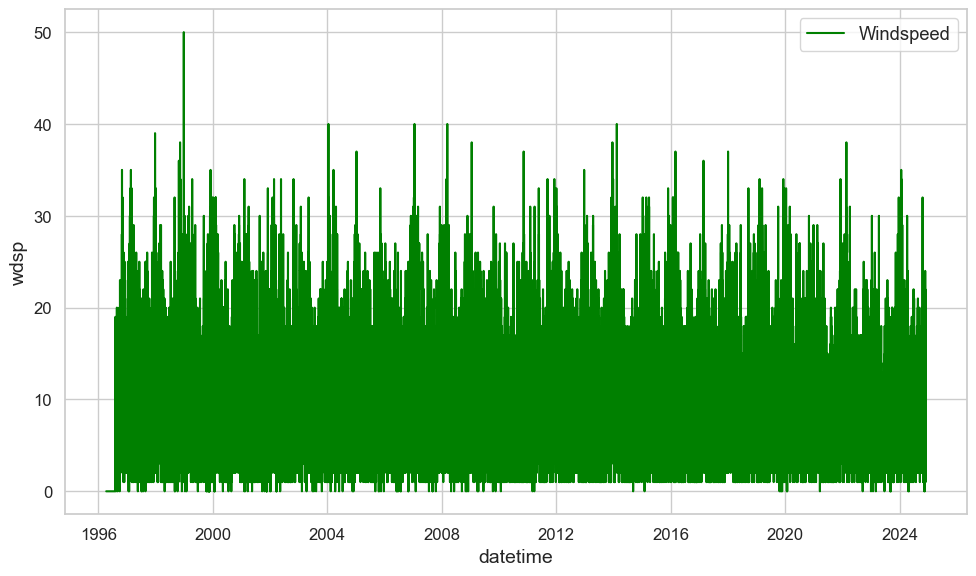

In [66]:
# The Windspeed
sns.lineplot(data=df, x='datetime', y='wdsp', label='Windspeed', color='green')

<Axes: xlabel='datetime', ylabel='wdsp'>

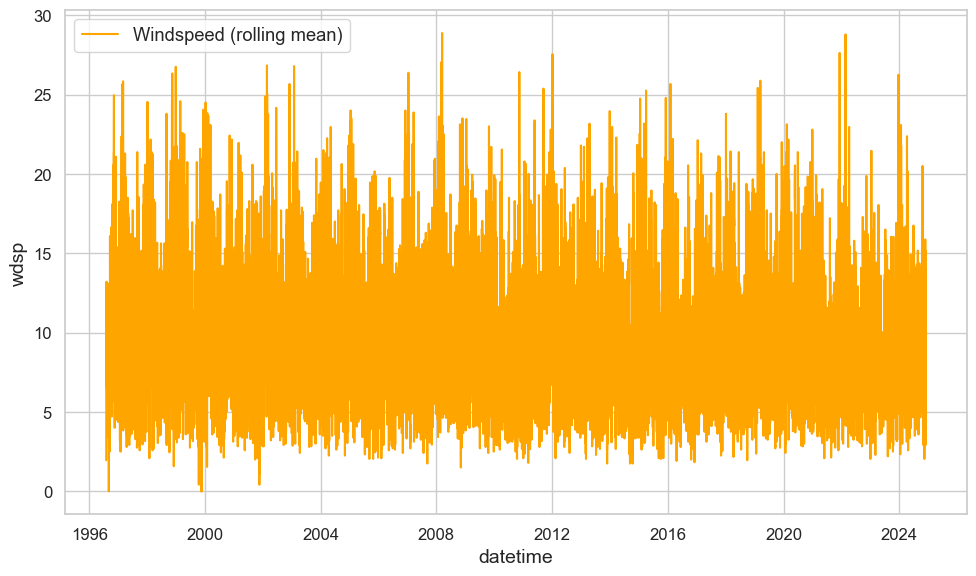

In [68]:
# The rolling windspeed (say over 24 hours)
rolling_wdsp = df['wdsp'].rolling(window=24).mean()
sns.lineplot(data=rolling_wdsp, label='Windspeed (rolling mean)', color='orange')

<Axes: xlabel='datetime', ylabel='wdsp'>

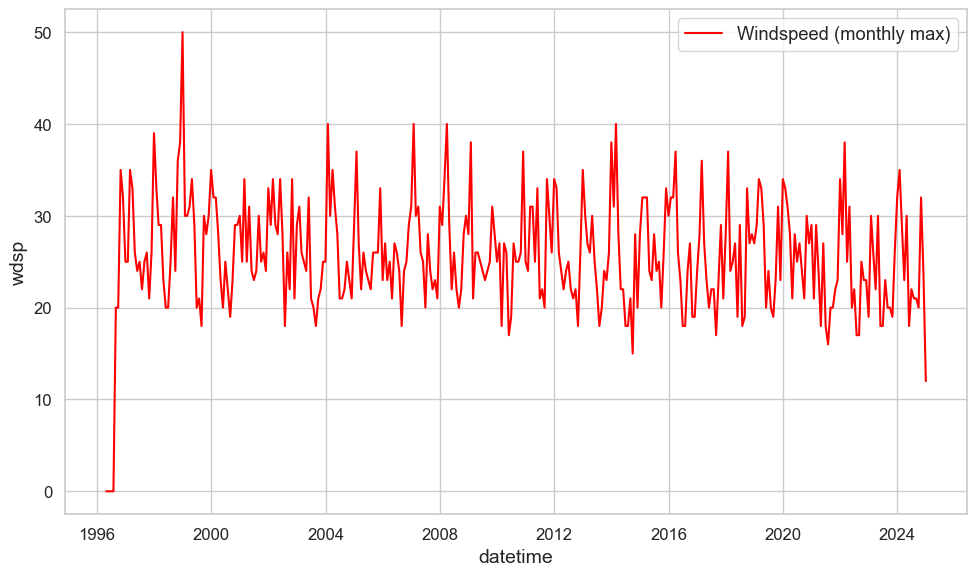

In [69]:
# The max windspeed for each day
rs_1month_max = df['wdsp'].resample("ME").max()
sns.lineplot(data=rs_1month_max, label='Windspeed (monthly max)', color='red')

<Axes: xlabel='datetime', ylabel='wdsp'>

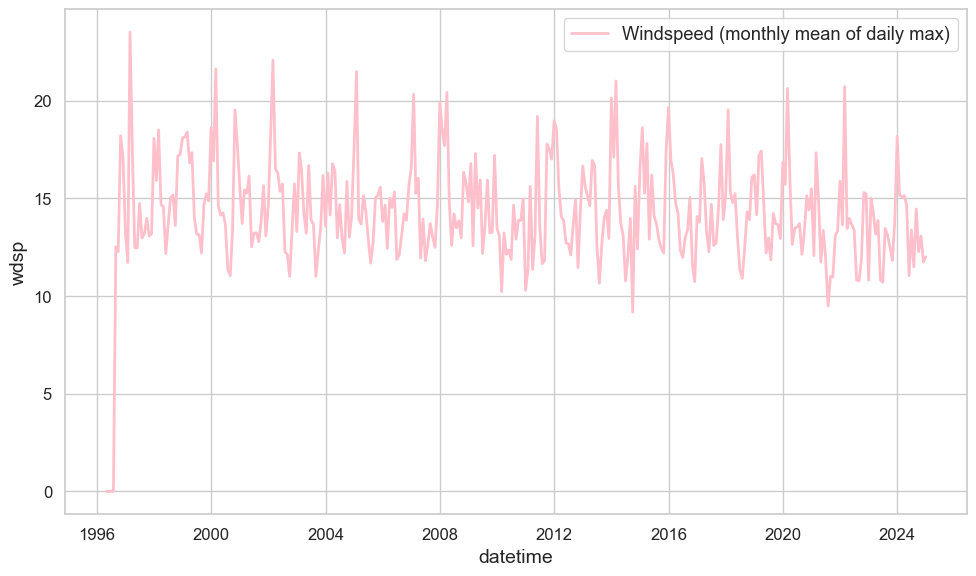

In [76]:
# The monthly mean of the daily max windspeeds
rs_1day_max = df['wdsp'].resample("D").max()
rs_1month_max = rs_1day_max.resample("ME").mean()
sns.lineplot(data=rs_1month_max, 
             label='Windspeed (monthly mean of daily max)', 
             color='pink',
             linewidth=2
             )